In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Harshit\Downloads\big\2019-Nov.csv")

In [3]:
df['category_code'] = df['category_code'].fillna('Unknown')
df['brand'] = df['brand'].fillna('Unknown')


In [4]:
df['event_time']=pd.to_datetime(df['event_time'])


In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,Unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [6]:
view = df[df.event_type =='view'].user_id.nunique()
cart  = df[df.event_type=='cart'].user_id.nunique()
remove_from_cart = df[df.event_type=='remove_from_cart'].user_id.nunique()
purchase = df[df.event_type=='purchase'].user_id.nunique()


In [7]:
print(view,cart,remove_from_cart,purchase)

3695598 826323 0 441638


| Stage       | Users  | Conversion Rate | Drop-off |
| ----------- | ------ | --------------- | -------- |
| View        | 3695598| -               | -        |
| Add to Cart | 826323 | 22.3596500154%             | 2869275   |
| Purchase    | 441638 | 53.4452024208%             | 384685   |


In [8]:


dff = pd.DataFrame({
    'stage': ['View', 'Cart', 'Purchase'],
    'users': [view, cart, purchase]
})

px.funnel(dff, x='users', y='stage')


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# top 5 brands
top5_brands =(df.groupby('brand')['user_id']
              .nunique()
              .sort_values(ascending=False)
              .head(5)
              )

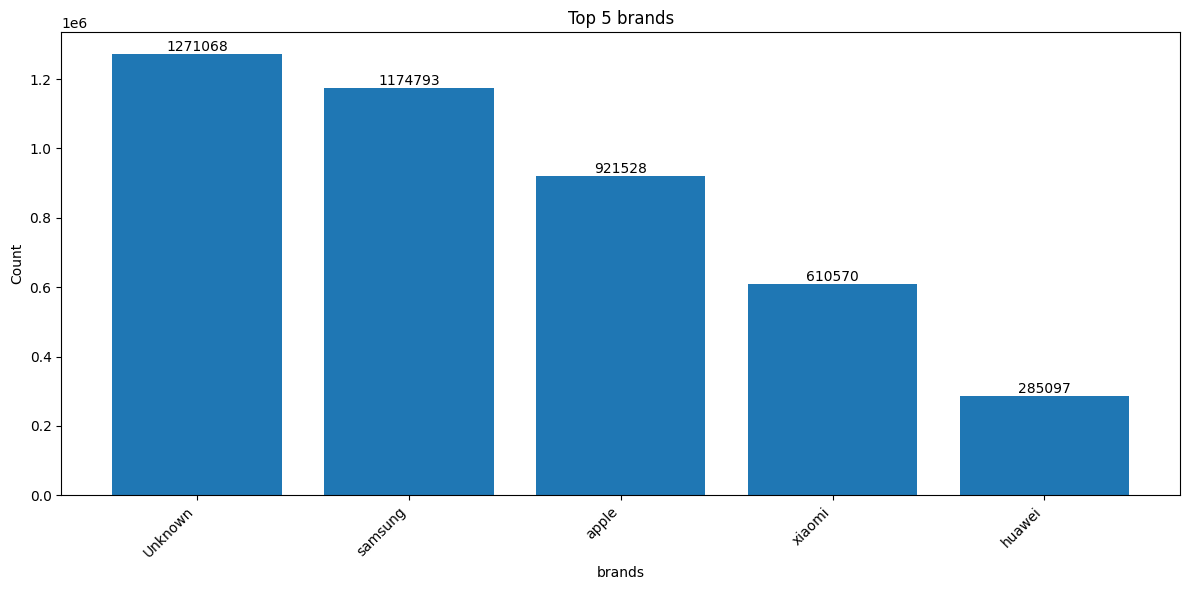

In [11]:
plt.figure(figsize=(12,6))
bars = plt.bar(top5_brands.index, top5_brands.values)

# Add number labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-position
        height,                           # Y-position (top of bar)
        str(int(height)),                 # Text value
        ha='center', va='bottom', fontsize=10)


plt.title("Top 5 brands")
plt.xlabel("brands")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# top 5 categories
top5 = (
    df.groupby('category_code')['user_id']
      .nunique()
      .sort_values(ascending=False)
      .head(5)
)


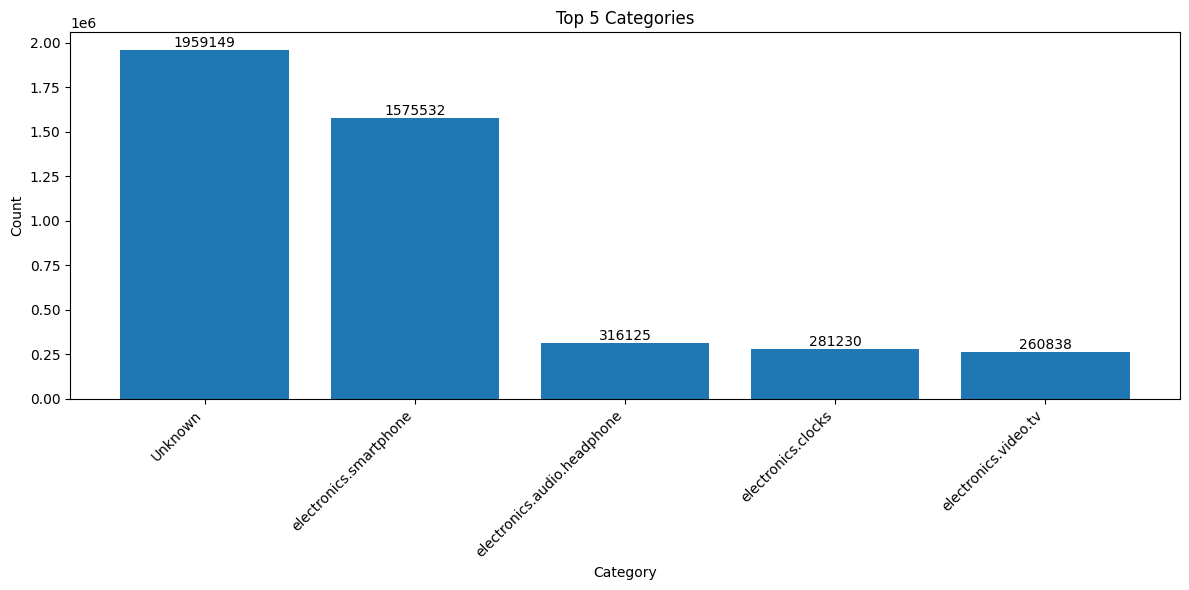

In [13]:
plt.figure(figsize=(12,6))
bars = plt.bar(top5.index, top5.values)

# Add number labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-position
        height,                           # Y-position (top of bar)
        str(int(height)),                 # Text value
        ha='center', va='bottom', fontsize=10)


plt.title("Top 5 Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [14]:
# caregory wise convertion rate 

view_users = df[df.event_type=='view'].groupby('category_code')['user_id'].nunique()
cart_users = df[df.event_type=='cart'].groupby('category_code')['user_id'].nunique()

cc=category_conversion = (cart_users / view_users * 100).sort_values(ascending=False).head(10)


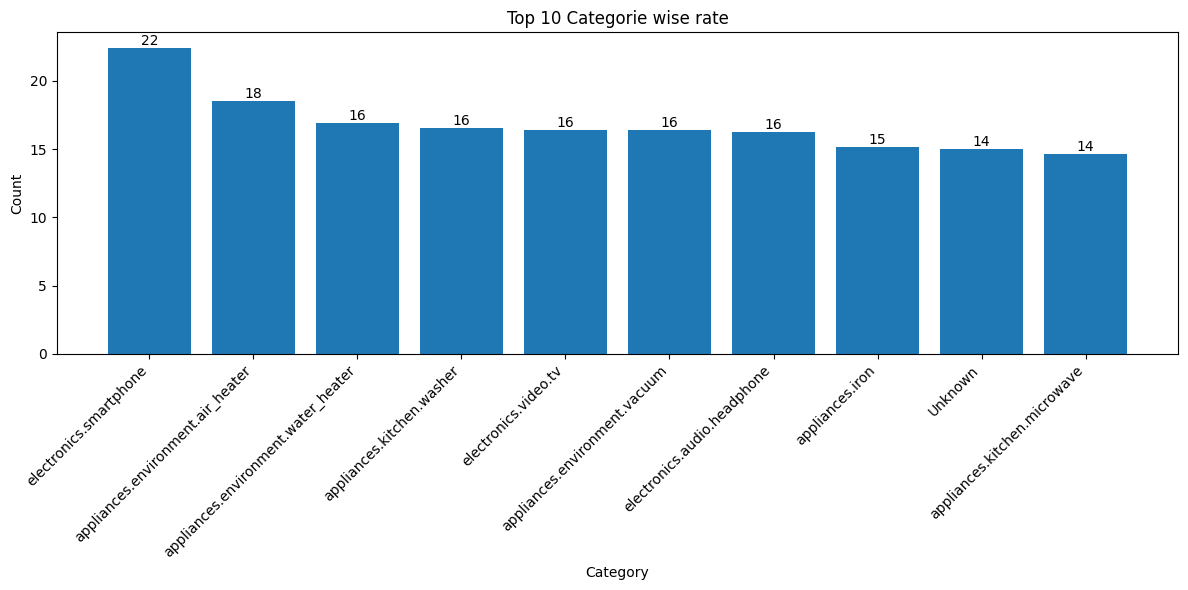

In [15]:
plt.figure(figsize=(12,6))
bars = plt.bar(cc.index,cc.values)

# Add number labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-position
        height,                           # Y-position (top of bar)
        str(int(height)),                 # Text value
        ha='center', va='bottom', fontsize=10)


plt.title("Top 10 Categorie wise rate")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# top 10 product view to cart convertion rate 

In [16]:
view_use=df[df.event_type=="view"].groupby('product_id')['user_id'].nunique()
cart_use=df[df.event_type=="cart"].groupby('product_id')['user_id'].nunique()

In [17]:
# store values in dataframe
vc = pd.DataFrame({
    'views': view_use,
    'carts': cart_use
}).fillna(0)



In [18]:
# filtering  data where view is less then 20 
vc = vc[vc['views'] >= 20]


In [19]:
# get convertion rate 
vc['view_to_cart_rate'] = (vc['carts'] / vc['views']) * 100


In [20]:
vc_sorted = vc.sort_values('view_to_cart_rate', ascending=False)


In [21]:
vc_sorted.head()


,views,carts,view_to_cart_rate
product_id,,,
12700972,20,9.0,45.000000
40000012,35,15.0,42.857143
12700762,21,7.0,33.333333
16200170,46,14.0,30.434783
16200350,46,14.0,30.434783


In [22]:
price_data = df.groupby('product_id')['price'].mean()

vc_sorted = vc_sorted.join(price_data)


In [23]:
vc_sorted.head(10)

,views,carts,view_to_cart_rate,price
product_id,,,,
12700972,20,9.0,45.000000,63.214706
40000012,35,15.0,42.857143,179.260000
12700762,21,7.0,33.333333,200.780000
16200170,46,14.0,30.434783,12.700000
16200350,46,14.0,30.434783,17.500000
12720508,89,27.0,30.337079,74.884504
12718732,33,10.0,30.303030,148.565769
100015229,53,16.0,30.188679,10.413669
21800212,20,6.0,30.000000,1.520000


In [24]:
#probabily high price products
conv_df = pd.concat([view_use, cart_use], axis=1).rename(columns={
    'user_id':'views',
    'user_id':'carts'
})
conv_df.columns = ['views', 'carts']

conv_df['view_to_cart_rate'] = conv_df['carts'] / conv_df['views']
conv_df = conv_df.fillna(0)


In [25]:
high_price_suspects = conv_df[(conv_df['views'] > 200 ) & (conv_df['view_to_cart_rate'] < 0.01)]
high_price_suspects.head(11136)

,views,carts,view_to_cart_rate
product_id,,,
1000978,4778,42.0,0.008790
1002099,2018,0.0,0.000000
1002103,495,0.0,0.000000
1002225,475,1.0,0.002105
1002396,307,1.0,0.003257
...,...,...,...
100020502,1515,15.0,0.009901
100020510,1112,6.0,0.005396
100021155,430,2.0,0.004651


# Conclusion: Identifying High-Priced Products

Based on the high_price_suspect:

*  Products with high view count but low or zero cart additions show strong customer interest but low purchase intent.

*   This suggests the price may be too high compared to customer expectations or competitor pricing.

# For example:

*   If a product has 200 views and 0 carts, its cart conversion = 0%

*   This is a strong signal of overpricing or mismatch between value and price.

*   Thus, products with high traffic but <1% view-to-cart conversion are likely overpriced.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67401460 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 5.0+ GB


# High-price VS low price category performance

In [27]:
# Avg price of category
cat_avg_piz = df.groupby('category_code')['price'].mean()

#Conversion rate per category
ac_category_conversion = (cart_users / view_users*100).fillna(0)


In [28]:
#store in pd.DataFrame
category_df=pd.DataFrame({
    "avg_price": cat_avg_piz,
    "view": view_users,
    "cart": cart_users,
    "convertion_rate":ac_category_conversion

}).sort_values('avg_price',ascending=False)

In [29]:
# Create price buckets (High / Low)
price_median = category_df["avg_price"].median()
conv_median = category_df["convertion_rate"].median()

# defineing fuction accouding to condition
def classify(row):
    price = row["avg_price"]
    conv = row["convertion_rate"]
    
    # HIGH PRICE & LOW CONVERSION → Overpriced
    if price > price_median and conv < conv_median:
        return "Overpriced Category"
    
    # HIGH PRICE & HIGH CONVERSION → Premium & Healthy
    elif price > price_median and conv >= conv_median:
        return "Premium (Price Accepted)"
    
    # LOW PRICE & HIGH CONVERSION → Strong Budget Category
    elif price <= price_median and conv >= conv_median:
        return "Strong Budget Category"
    
    # LOW PRICE & LOW CONVERSION → Weak / Not Attractive
    else:
        return "Weak Category (Not Price Issue)"

# Apply to dataset
category_df["price_performance"] = category_df.apply(classify, axis=1)

category_df.head(10)



,avg_price,view,cart,convertion_rate,price_performance
category_code,,,,,
electronics.camera.photo,780.224347,5370,342.0,6.368715,Overpriced Category
electronics.video.projector,730.525271,5513,231.0,4.190096,Overpriced Category
computers.notebook,724.374202,197515,24969.0,12.641572,Premium (Price Accepted)
furniture.living_room.sofa,623.819286,69807,3305.0,4.734482,Overpriced Category
computers.desktop,603.995850,97724,6219.0,6.363841,Overpriced Category
auto.accessories.winch,498.720402,2649,21.0,0.792752,Overpriced Category
electronics.smartphone,483.854456,1574985,353154.0,22.422690,Premium (Price Accepted)
electronics.video.tv,470.389100,260770,42801.0,16.413314,Premium (Price Accepted)
sport.bicycle,439.935735,22079,1004.0,4.547307,Overpriced Category


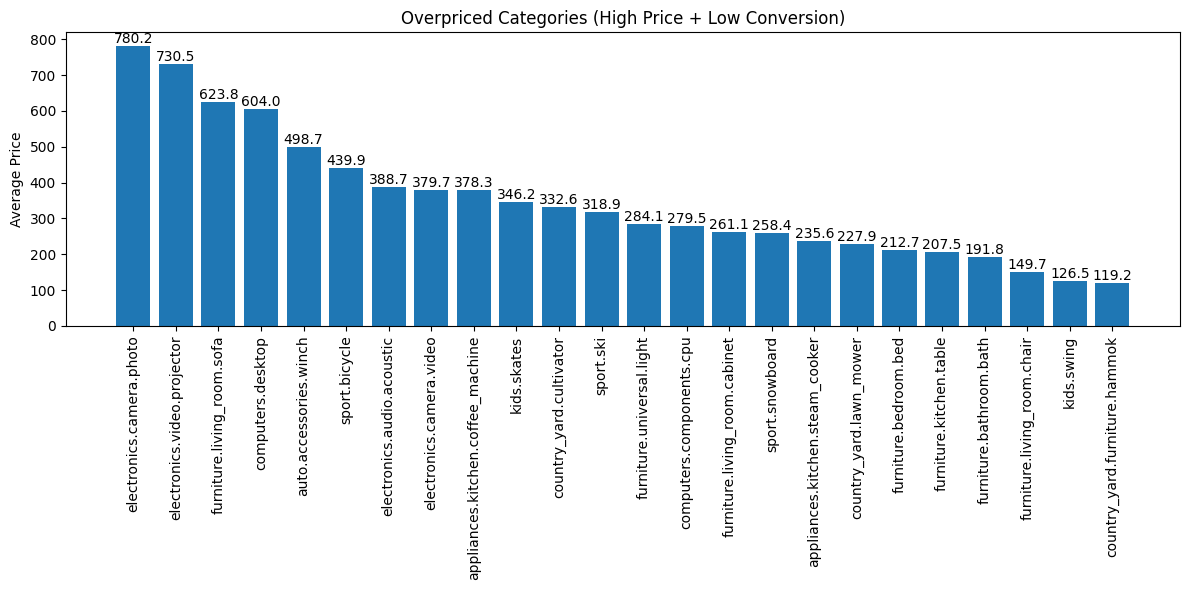

In [30]:
# Bar Chart of Overpriced Categories

overpriced = category_df[category_df["price_performance"] == "Overpriced Category"]

plt.figure(figsize=(12,6))
bars = plt.bar(overpriced.index, overpriced["avg_price"])

# Add numbers on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.1f}", ha='center', va='bottom')

plt.title("Overpriced Categories (High Price + Low Conversion)")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


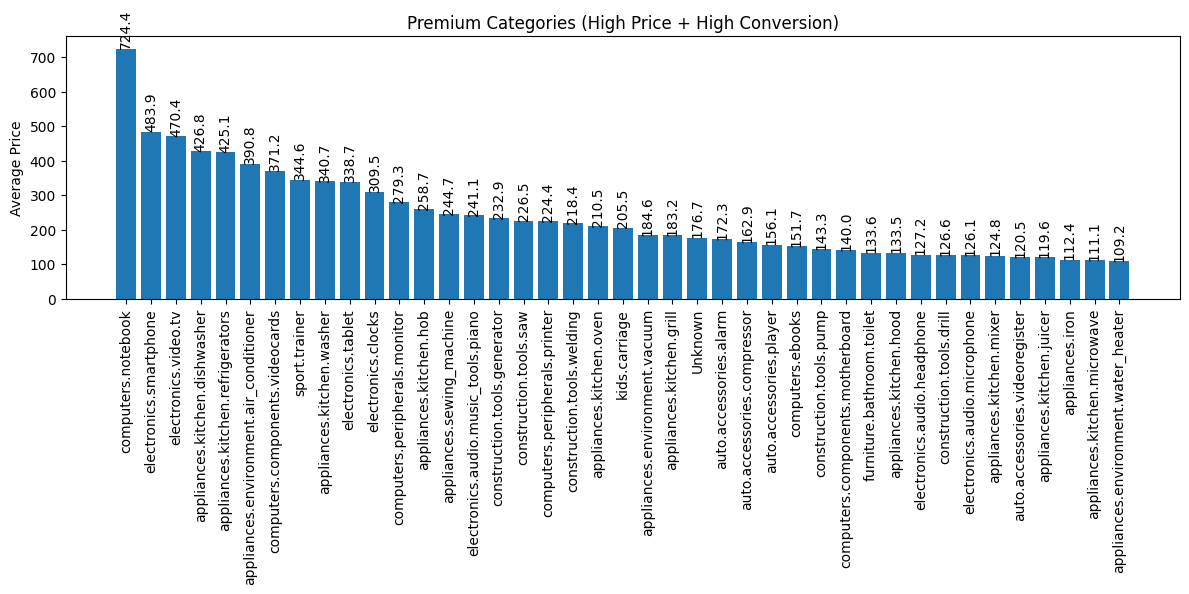

In [31]:
# Bar Chart of premium Categories
premium = category_df[category_df["price_performance"] == "Premium (Price Accepted)"]

plt.figure(figsize=(12,6))
bars = plt.bar(premium.index, premium["avg_price"])

# Add labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.1f}", ha='center', va='bottom',
             rotation=90 )

plt.title("Premium Categories (High Price + High Conversion)")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# top 10 categories which generate more revenue

In [32]:
top_categories_generated_more_revenue = df.groupby('category_code')['price'].sum().sort_values(ascending=False).head(10)


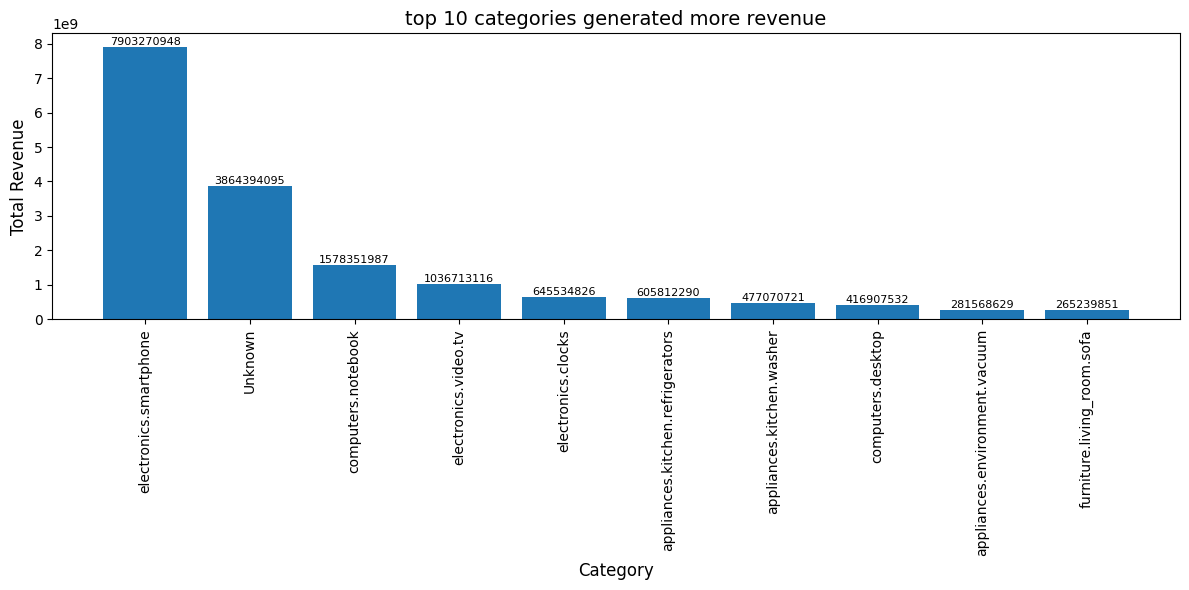

In [33]:
plt.figure(figsize=(12,6))
bars = plt.bar(top_categories_generated_more_revenue.index, top_categories_generated_more_revenue.values)

plt.title("top 10 categories generated more revenue", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=90)

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.0f}",
        ha='center', va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# top 10 categories which generate least revenue

In [34]:
top_categories_generated_least_revenue = df.groupby('category_code')['price'].sum().sort_values(ascending=True).head(10)

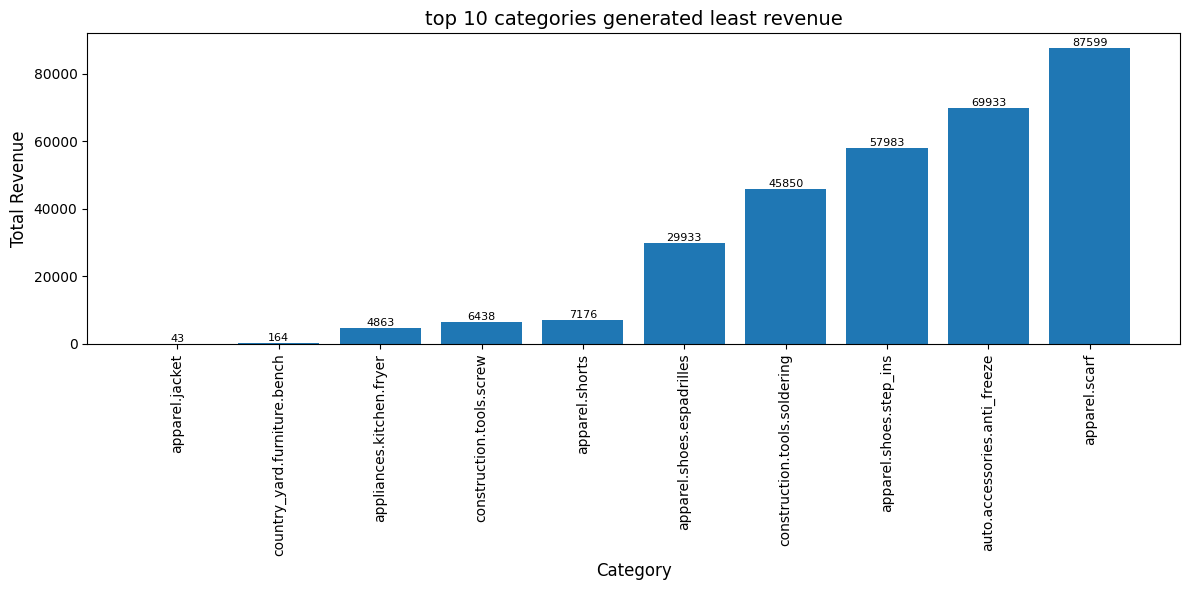

In [35]:
plt.figure(figsize=(12,6))
bars = plt.bar(top_categories_generated_least_revenue.index, top_categories_generated_least_revenue.values)

plt.title("top 10 categories generated least revenue", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=90)

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.0f}",
        ha='center', va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.show()

# AVG ORDER VALUE OF CATEGORY

In [36]:
purchases = df[df.event_type == "purchase"]


aov_by_category = purchases.groupby('category_code')['price'].mean().sort_values(ascending=False).head(20)




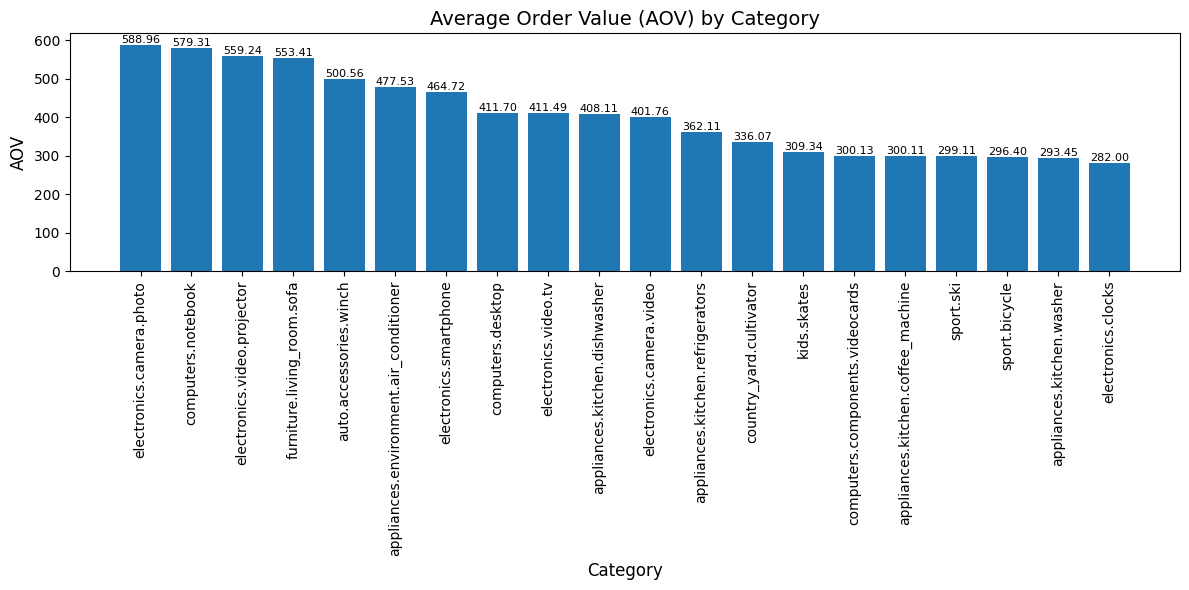

In [37]:


plt.figure(figsize=(12,6))
bars = plt.bar(aov_by_category.index, aov_by_category.values)

plt.title("Average Order Value (AOV) by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("AOV", fontsize=12)
plt.xticks(rotation=90)

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=8,
    )

plt.tight_layout()
plt.show()
